In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the datasets
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

In [5]:
# 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotionLabels = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

emotion_counts = train_data['emotion'].value_counts()

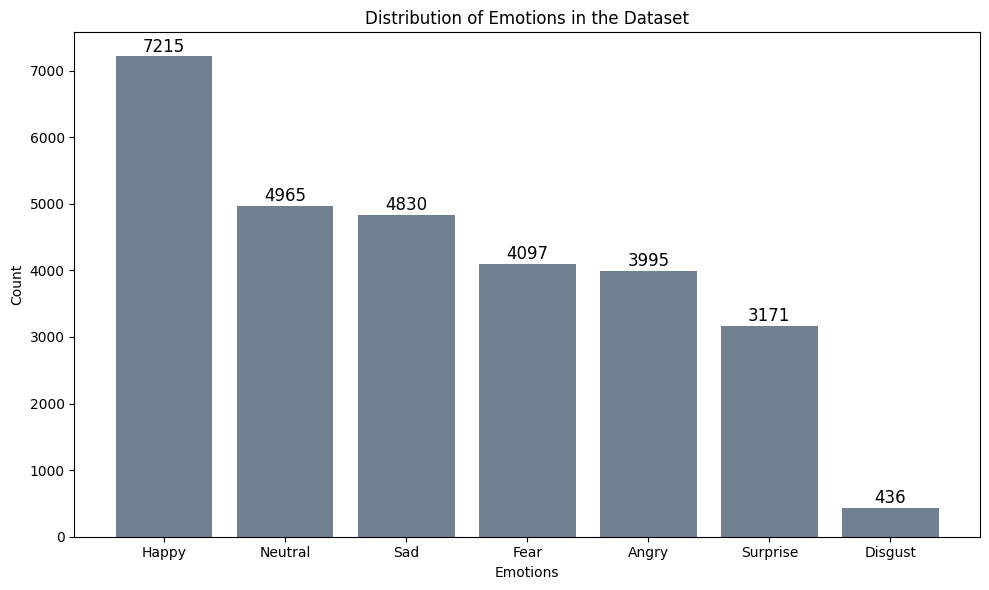

In [6]:
# Count the number of occurrences of each emotion
plt.figure(figsize=(10, 6))

plt.bar([emotionLabels[i] for i in emotion_counts.index], emotion_counts.values, color=['slategray'])

plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Distribution of Emotions in the Dataset')

for i, count in enumerate(emotion_counts.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


In [7]:
# Function to convert pixel string to image array
def pixels_to_image(pixels_str):
    pixels = np.array(pixels_str.split(), dtype='float32')  
    return pixels.reshape(48, 48)  # Reshape into 48x48 because the images are 48x48 pixels

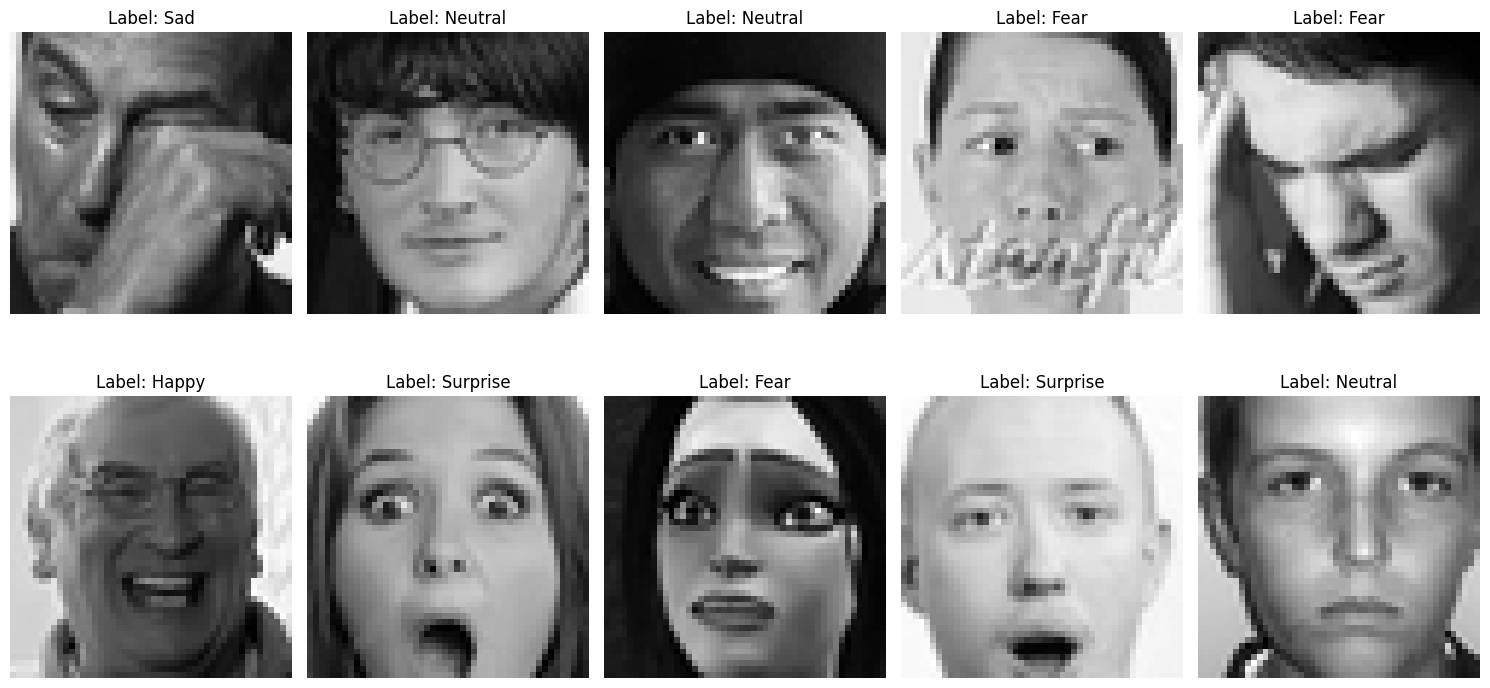

In [8]:
# Display 10 random images
plt.figure(figsize=(15, 8))
for i in range(10):
    idx = np.random.randint(0, len(train_data))

    pixels = train_data.iloc[idx]['pixels']
    label = train_data.iloc[idx]['emotion']  

    # Convert pixels to image
    image = pixels_to_image(pixels)

    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {emotionLabels[label]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# BUILDING MODEL

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.utils import to_categorical

In [10]:
X = train_data['pixels'].apply(lambda x: np.array(x.split()).astype('float32'))
y = train_data['emotion']

# 48x48 pixels
X = np.stack(X.values)
X = X.reshape(-1, 48, 48, 1) 

# Normalize
X = X / 255.0

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=7)

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [12]:
learning_rate = 0.001
dropout_rate = 0.25

In [13]:
model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(dropout_rate),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(7, activation='softmax')
    ])

/opt/anaconda3/envs/ML/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353,671 (1.35 MB)

 Trainable params: 353,671 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [17]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=256,
                    callbacks=[early_stopping])

model.save('model_best.keras')

# EvaluatE
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - accuracy: 0.2251 - loss: 1.8555 - val_accuracy: 0.2618 - val_loss: 1.8099
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.2494 - loss: 1.7937 - val_accuracy: 0.3220 - val_loss: 1.7039
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.3171 - loss: 1.7061 - val_accuracy: 0.3917 - val_loss: 1.5851
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.3713 - loss: 1.6081 - val_accuracy: 0.4115 - val_loss: 1.5114
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 204ms/step - accuracy: 0.4077 - loss: 1.5362 - val_accuracy: 0.4596 - val_loss: 1.4335
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 211ms/step - accuracy: 0.4293 - loss: 1.4874 - val_accuracy: 0.4786 - val_loss: 1.3862
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 206ms/step - accuracy: 0.4512 - loss: 1.4277 - val_accuracy: 0.4908 - val_loss: 1.3502
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 202ms/step - accuracy: 0.4683 - loss: 1.3902 - 

In [18]:
def plot_model_history_only(history):
  """
  Plots the training and validation metrics from the model's history object.

  Args:
    history: A tf.keras.callbacks.History object returned by model.fit().
  """
  metrics = [key for key in history.history if not key.startswith('val_')]

  for metric_name in metrics:
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(history.history[metric_name]) + 1)
    plt.plot(epochs, history.history[metric_name], 'b-', label=f'Training {metric_name}')

    val_metric_name = f'val_{metric_name}'
    if val_metric_name in history.history:
      plt.plot(epochs, history.history[val_metric_name], 'r-', label=f'Validation {metric_name}')
      plt.legend()

    plt.title(f'Training and Validation {metric_name}')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name.capitalize())
    plt.grid(True)
    plt.show()


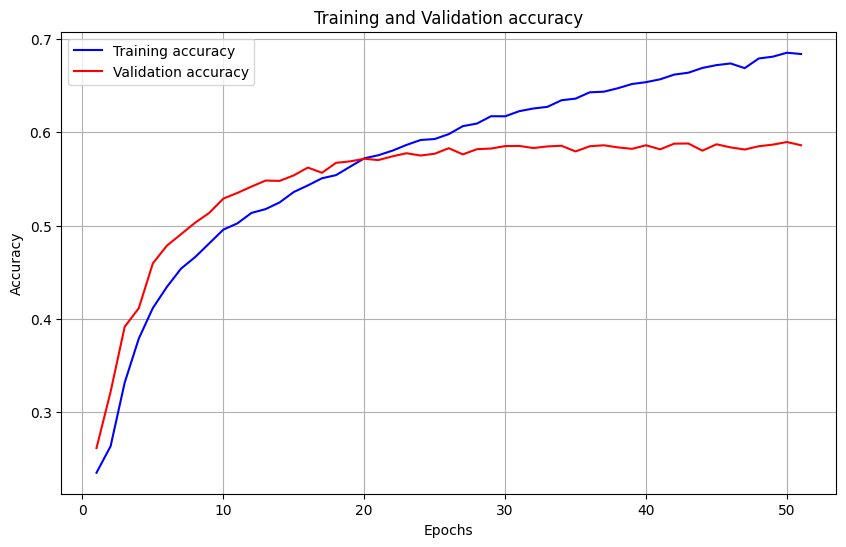

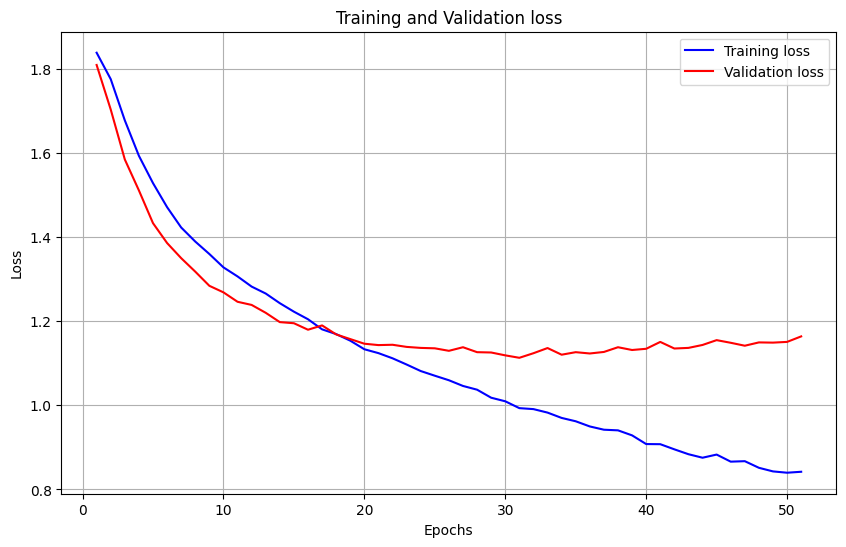

In [19]:
plot_model_history_only(history)